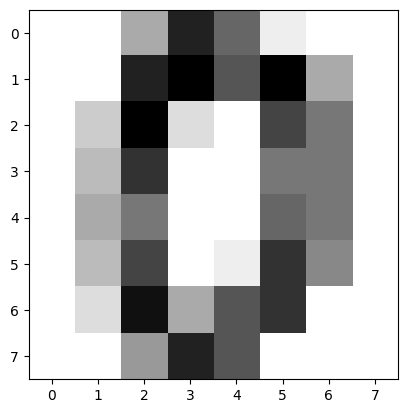

In [17]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

# 데이터셋 불러오기
digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [18]:
# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, random_state=42, stratify=digits.target
)

In [19]:
# ---- 0) 경사하강법 ----
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

sgd_clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("sgd", SGDClassifier(
        loss="log_loss",
        learning_rate="optimal",
        alpha=1e-4,
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ))
])
sgd_clf.fit(X_train, y_train)
y_pred_sgd = sgd_clf.predict(X_test)
print("SGD(경사하강법) 정확도:", metrics.accuracy_score(y_test, y_pred_sgd))

SGD(경사하강법) 정확도: 0.9333333333333333


In [20]:
# ---- 1) KNN ----
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN 정확도:", metrics.accuracy_score(y_test, y_pred_knn))

KNN 정확도: 0.9805555555555555


In [21]:
# ---- 2) Decision Tree ----
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree 정확도:", metrics.accuracy_score(y_test, y_pred_dt))

Decision Tree 정확도: 0.825


In [22]:
# ---- 3) Logistic Regression ----
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression 정확도:", metrics.accuracy_score(y_test, y_pred_lr))

Logistic Regression 정확도: 0.9583333333333334


In [23]:
# ---- 4) Random Forest ----
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest 정확도:", metrics.accuracy_score(y_test, y_pred_rf))

Random Forest 정확도: 0.9638888888888889


예측 결과: [0]


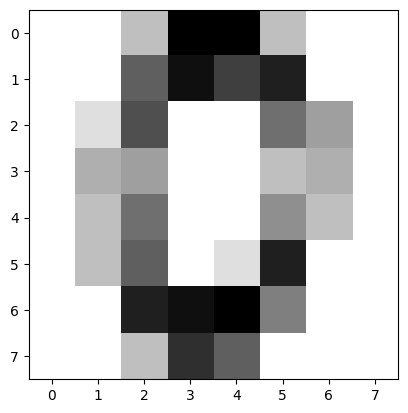

In [24]:
# 테스트 이미지 시각화 + 예측
plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
print("예측 결과:", knn.predict([X_test[10]]))